     x(m)     y(m)  log2_ttllmassloading
0  674000  3538000            -26.758948
1  675000  3538000            -24.520160
2  676000  3538000            -22.152788
3  677000  3538000            -20.904415
4  678000  3538000            -19.291040


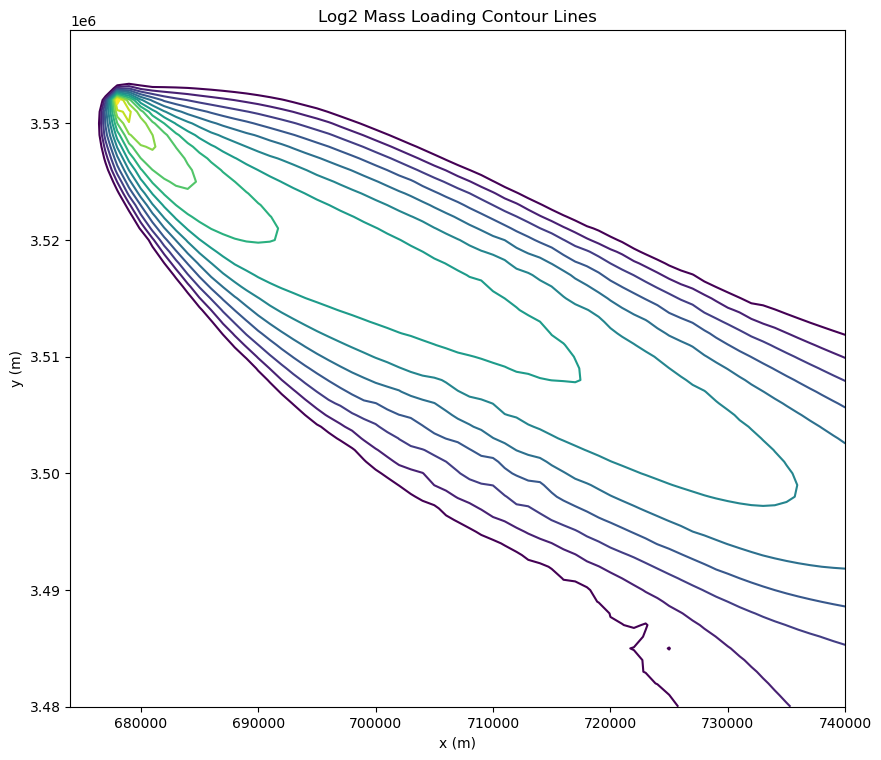

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# massloading.txt ファイルのパスを指定
file_path = 'massloading.txt'

# データの読み込み
data = pd.read_csv(file_path, sep='\t')  # 区切り文字がタブの場合（適宜変更）

# データの確認
data.head()

# 対数変換を行い、新しい列 'log10_ttllmassloading' を作成
data['log2_ttllmassloading'] = np.log10(data['ttlmassloading(kg/sq-m)']) / np.log10(2)

# 対数変換後のデータの確認
print(data[['x(m)', 'y(m)', 'log2_ttllmassloading']].head())

# ピボットテーブルを作成
pivot_data = data.pivot_table(index='y(m)', columns='x(m)', values='log2_ttllmassloading')

# 等値線を描画するレベルを指定
levels = np.arange(-3, pivot_data.max().max(), 1)  # 下限から上限まで1刻みで

# x軸とy軸の範囲を計算
x_min, x_max = pivot_data.columns.min(), pivot_data.columns.max()
y_min, y_max = pivot_data.index.min(), pivot_data.index.max()

delta_x = x_max - x_min
delta_y = y_max - y_min
plot_height = 10 * (delta_y / delta_x)

# コンター図の描画
plt.figure(figsize=(10, plot_height))

contour = plt.contour(pivot_data.columns, pivot_data.index, pivot_data, levels=levels, cmap='viridis')
#plt.colorbar(contour, label='log10(ttlmassloading)')
plt.title('Log2 Mass Loading Contour Lines')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()
